In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
pip install 'numpy<2'

Note: you may need to restart the kernel to use updated packages.


In [5]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [7]:
X

array([[ -4.68994529,  -0.96348237],
       [ -4.62221137,   0.10981464],
       [  6.1610468 , -10.29019462],
       ...,
       [  6.00338015,  -9.22715658],
       [  6.60717547,  -8.71923326],
       [  6.8682896 ,  -9.06110151]])

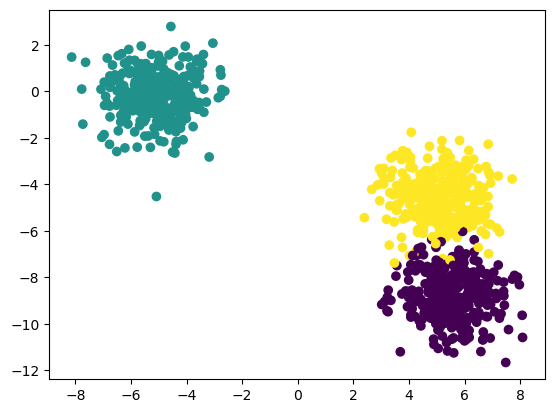

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
## standardization ---- feature scaling technique
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [14]:
X_train_scaled=scalar.fit_transform(X_train)

In [15]:
X_test_scaled=scalar.transform(X_test)

In [16]:
from sklearn.cluster import KMeans

In [20]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [21]:
wcss

[1339.9999999999995,
 226.58830268104714,
 72.95684965175364,
 63.084856000479974,
 51.30209517791309,
 42.5881690165986,
 39.87362364992936,
 35.597681721052226,
 31.975528353711436,
 28.45614769840527]

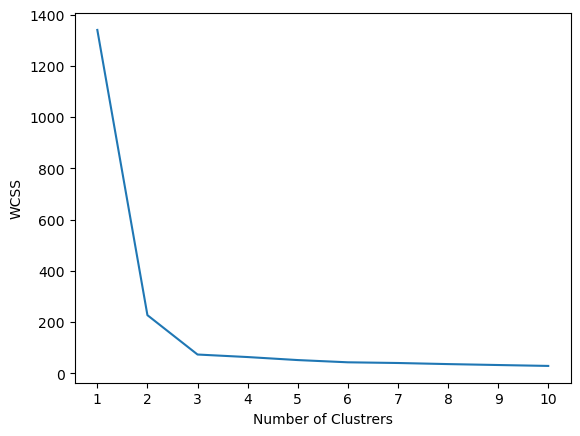

In [22]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [27]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [29]:
kmeans.fit_predict(X_train_scaled)

array([2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0,
       0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0,
       0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0,
       0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0,
       0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2,
       0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1,

In [31]:
y_pred=kmeans.predict(X_test_scaled)

In [33]:
y_pred

array([0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2,
       1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0,
       2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1,
       2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2,
       0, 2, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0,

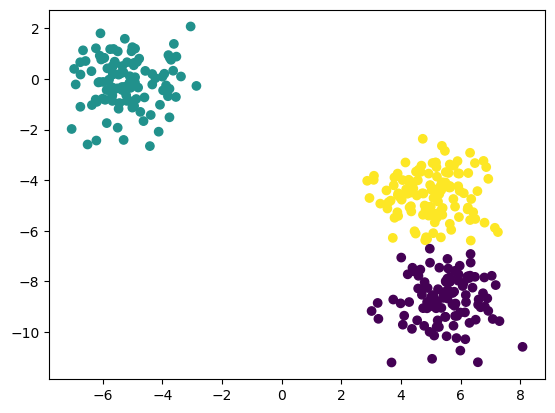

In [35]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [37]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [55]:
## kneelocator
!pip3 install kneed

In [57]:
!pip install --upgrade kneed

In [59]:
pip install 'numpy<2'

Note: you may need to restart the kernel to use updated packages.


In [61]:
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [63]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

NameError: name 'KneeLocator' is not defined

In [66]:
kl.elbow

NameError: name 'kl' is not defined

In [68]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [70]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [72]:
silhouette_coefficients

[0.7493613749461512,
 0.7024241111245777,
 0.5799391008038176,
 0.4189906186009406,
 0.35445399630641916,
 0.34924872426238157,
 0.34226839442317475,
 0.3364260427235594,
 0.3292675319342366]

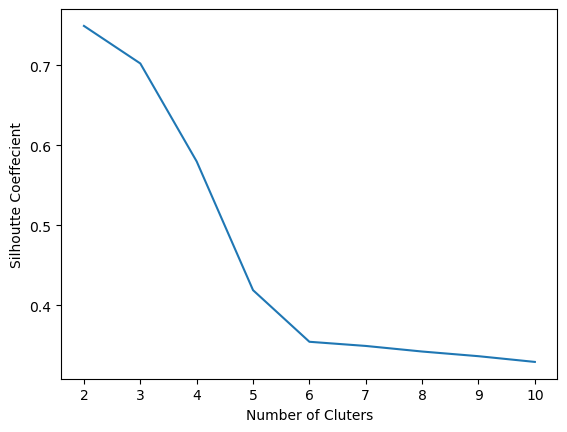

In [74]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()